<a href="https://colab.research.google.com/github/AnnisaFitry/PCVK_Genap_2023/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS

      Nama     : Annisa Fitri Yuliandra
      Kelas    : TI 3B
      No Absen : 05
      NIM      : 2041720123

# MORPHOLOGY

1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img_morfo = cv.imread('/content/drive/MyDrive/images/Images/morphology.png')
img_j = cv.imread('/content/drive/MyDrive/images/Images/j.png')
img_fp = cv.imread('/content/drive/MyDrive/images/Images/fingerprint.png')

3

In [ ]:
# Fungsi Dilasi
def dilate_cross_3x3(image):
    image = np.array(image)

    # membuat kernel cross 3x3
    kernel = np.array([[0, 1, 0],
                      [1, 1, 1],
                      [0, 1, 0]])

    # membuat gambar hasil dilasi
    dilated_image = np.zeros_like(image)

    # melakukan operasi dilasi pada gambar
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            # mengambil bagian gambar yang akan dioperasikan
            image_patch = image[i-1:i+2, j-1:j+2]

            # melakukan operasi dilasi dengan kernel cross 3x3
            dilated_value = np.max(image_patch * kernel)

            # memasukkan hasil operasi ke dalam gambar hasil dilasi
            dilated_image[i, j] = dilated_value

    return dilated_image

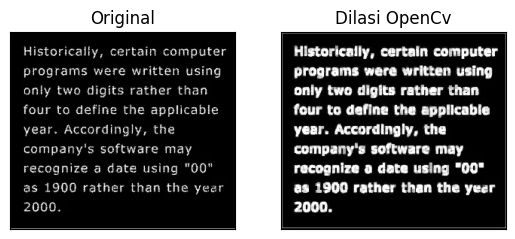

In [ ]:
dilation2 = dilate_cross_3x3(img_morfo)

# menampilkan gambar asli dan hasil dilasi
plt.subplot(121),plt.imshow(img_morfo),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation2),plt.title('Dilasi OpenCv')
plt.xticks([]), plt.yticks([])
plt.show()

4

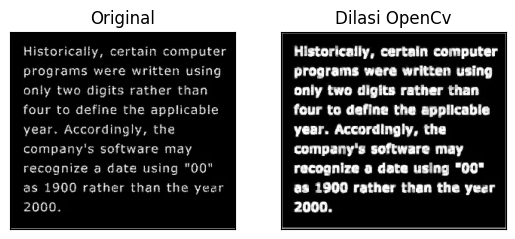

In [ ]:
# Library OpenCV Dilasi
kernel = np.ones((3,3),np.uint8)
dilation1 = cv.dilate(img_morfo,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img_morfo),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation1),plt.title('Dilasi OpenCv')
plt.xticks([]), plt.yticks([])
plt.show()

5

In [42]:
# Fungsi Erosi
def erosi(img):
    # membuat Structuring Element berbentuk square 5x5
    SE = np.ones((5,5), np.uint8)
    
    # mendapatkan ukuran gambar
    rows, cols = img.shape
    
    # membuat gambar hasil erosi dengan nilai piksel 255
    erosi_img = np.ones((rows, cols), dtype=np.uint8) * 255
    
    # melakukan erosi
    for i in range(2, rows-2):
        for j in range(2, cols-2):
            # mengambil bagian gambar yang akan dioperasikan dengan SE
            img_part = img[i-2:i+3, j-2:j+3]
            
            # melakukan operasi bitwise AND antara SE dan bagian gambar
            result = cv.bitwise_and(img_part, SE)
            
            # jika seluruh nilai piksel pada hasil AND adalah 255, maka hasil erosi pada piksel adalah 255, 
            # jika tidak maka hasil erosi pada piksel adalah 0
            if np.all(result == 255):
                erosi_img[i,j] = 255
            else:
                erosi_img[i,j] = 0
                
    return erosi_img

In [43]:
erode2 = erosi(img_j)

# menampilkan gambar asli dan hasil dilasi
plt.subplot(121),plt.imshow(img_j),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erode2),plt.title('Dilasi OpenCv')
plt.xticks([]), plt.yticks([])
plt.show()

ValueError: ignored

6

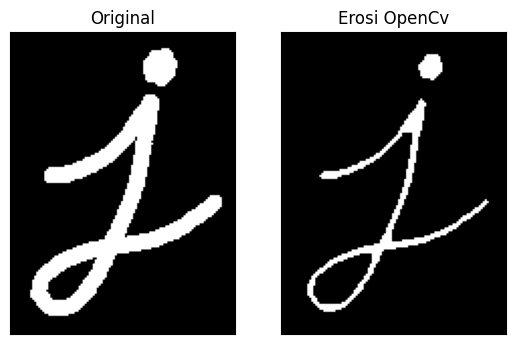

In [44]:
# Library OpenCV Erosi
kernel = np.ones((5,5),np.uint8)
erode1 = cv.erode(img_j,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img_j),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erode1),plt.title('Erosi OpenCv')
plt.xticks([]), plt.yticks([])
plt.show()

7

<ipython-input-46-a3d89b05d912>:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

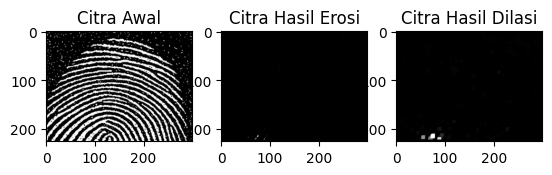

In [46]:
# tanpa menggunakan library morphology dari openCV

# Membaca image untuk operasi erosi
img7 = cv.imread('/content/drive/MyDrive/images/Images/fingerprint.png', 0)

#Acquire size of the image
m, n = img7.shape

#Show the image
plt.imshow(img7, cmap="gray")

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 7
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant): #constant adalah tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,n-constant):
    temp = img7[i-constant:i+constant+1, j-constant:j+constant+1] #temp digunakan untuk menampung atau menyimpan data untuk sementara
    product = temp * SE
    imgErode[i,j] = np.min(product)

#Read the image for dilation
img7_2 = imgErode

#Acquire size of the image
p, q= img7_2.shape

#Show the image
plt.imshow(img7_2, cmap="gray")

#Define new image to store the pixels of dilated image
imgDilate = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element 
SED = np.array([[1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1]])
constant1 = 3

#Dilation operation without using inbuilt cv2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img7_2[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

plt.subplot(131),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Erosi')
plt.subplot(133),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Dilasi')

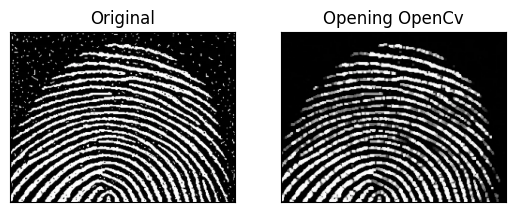

In [47]:
# Library OpenCV Opening 
kernel = np.ones((3,3),np.uint8)
open1 = cv.morphologyEx(img_fp, cv.MORPH_OPEN, kernel)
plt.subplot(121),plt.imshow(img_fp),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(open1),plt.title('Opening OpenCv')
plt.xticks([]), plt.yticks([])
plt.show()

8

<ipython-input-48-54aee16dd99b>:49: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img8, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

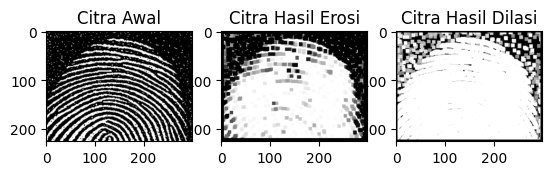

In [48]:
# Fungsi Closing
#Read the image for dilation
img8 = cv.imread('/content/drive/MyDrive/images/Images/fingerprint.png',0)
#Acquire size of the image
p, q = img8.shape

#Show the image
plt.imshow(img8, cmap="gray")

#Define new image to store the pixels of dilated image
imgDilate = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element 
SED = np.array([[1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1]])
constant1 = 3

#Dilation operation without using inbuilt CV2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img8[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

#Read the image for erosion
img8_2 = imgDilate

#Acquire size of the image
m, n= img8_2.shape 

#Show the image
plt.imshow(img8_2, cmap="gray")

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 7
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp = img8_2[i-constant:i+constant+1, j-constant:j+constant+1]
    product = temp * SE
    imgErode[i,j] = np.min(product)

plt.subplot(131),plt.imshow(img8, cmap="gray"),plt.title('Citra Awal')
plt.subplot(133),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Dilasi')
plt.subplot(132),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Erosi')
     

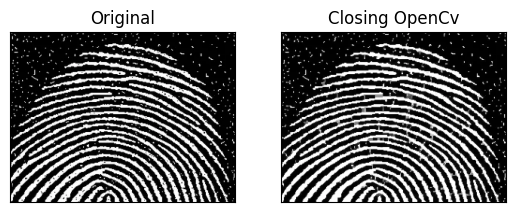

In [49]:
# Library OpenCV Closing
kernel = np.ones((3,3),np.uint8)
open1 = cv.morphologyEx(img_fp, cv.MORPH_CLOSE, kernel)
plt.subplot(121),plt.imshow(img_fp),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(open1),plt.title('Closing OpenCv')
plt.xticks([]), plt.yticks([])
plt.show()

9

SED = Cross 3


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

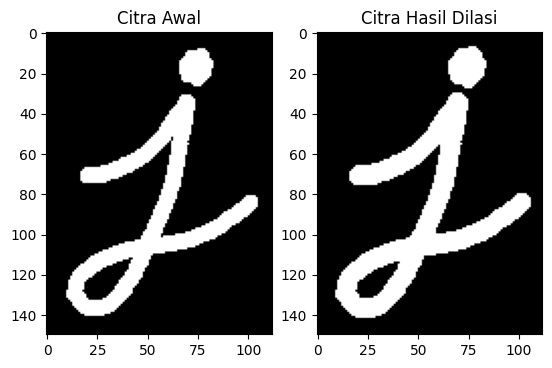

In [51]:
# Dilasi Cross 3 x 3
kernel = cv.getStructuringElement(cv.MORPH_CROSS,(3,3)) 
dilation = cv.dilate(img_j, kernel, iterations = 1)

print("SED = Cross 3")

plt.subplot(121),plt.imshow(img_j),plt.title('Citra Awal') 
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

SED = Cross 5


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

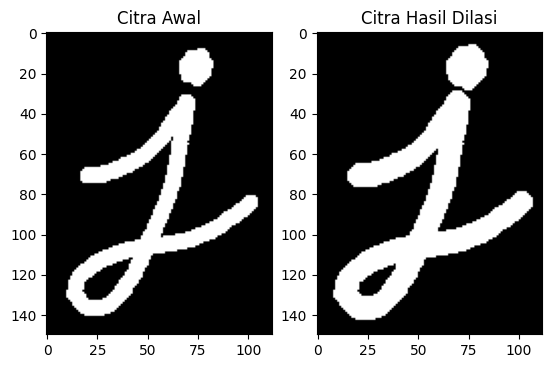

In [52]:
# Dilasi Cross 5 x 5
kernel = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype=np.uint8) 
kernel = cv.getStructuringElement(cv.MORPH_CROSS,(5,5)) 
dilation = cv.dilate(img_j, kernel, iterations = 1)

print("SED = Cross 5")

plt.subplot(121),plt.imshow(img_j),plt.title('Citra Awal') 
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

10

SED = Circle 3


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

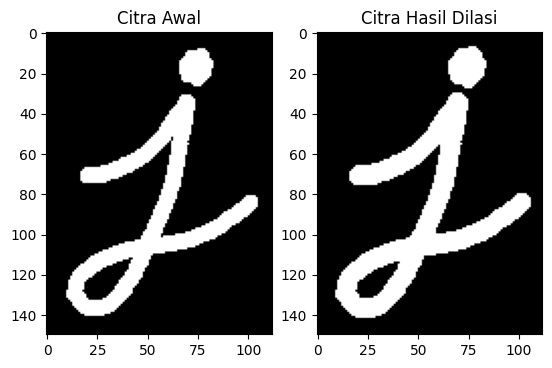

In [53]:
# Dilasi Circular 3 x 3 

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3)) 
dilation = cv.dilate(img_j, kernel, iterations = 1) 

print("SED = Circle 3")

plt.subplot(121),plt.imshow(img_j),plt.title('Citra Awal') 
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

SED = Circle 5


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

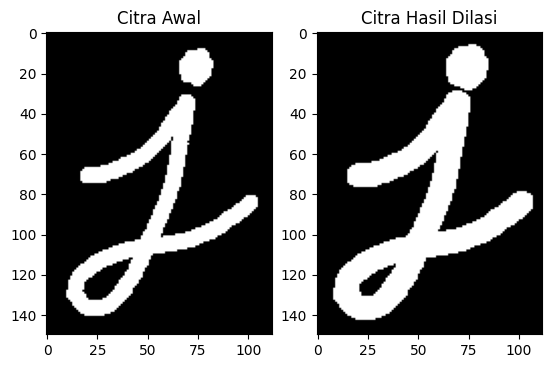

In [54]:
# Dilasi Circular 5 x 5

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)) 
dilation = cv.dilate(img_j, kernel, iterations = 1) 

print("SED = Circle 5")

plt.subplot(121),plt.imshow(img_j),plt.title('Citra Awal') 
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

11

SE = Rectangle 3x5


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

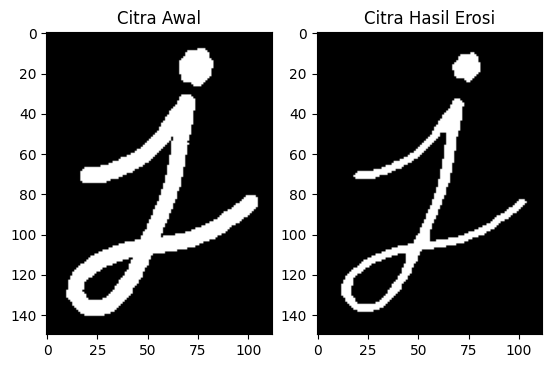

In [55]:
# Erosi Rectangle 3 x 5 

kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,5)) 
erosion = cv.erode(img_j, kernel, iterations = 1)

print("SE = Rectangle 3x5")

plt.subplot(121), plt.imshow(img_j), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

SE = Rectangle 5x7


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

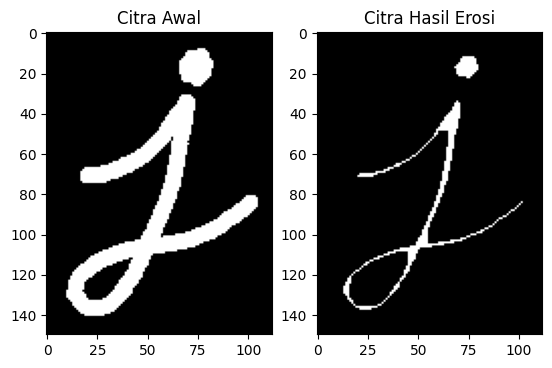

In [56]:
# Erosi Rectangle 5 x 7

kernel = cv.getStructuringElement(cv.MORPH_RECT,(5,7)) 
erosion = cv.erode(img_j, kernel, iterations = 1)

print("SE = Rectangle 5x7")

plt.subplot(121), plt.imshow(img_j), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

12

SE = Line Vertikal 3


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

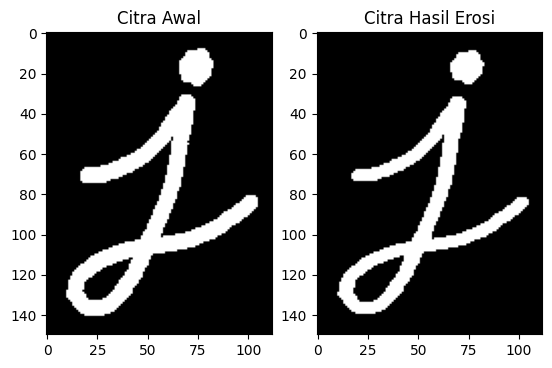

In [57]:
# Erosi Line Vertikal 3

kernel = np.ones((3,1),np.uint8) 
erosion = cv.morphologyEx(img_j, cv.MORPH_ERODE, kernel)

print("SE = Line Vertikal 3")

plt.subplot(121), plt.imshow(img_j), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

SE = Line Vertikal 5


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

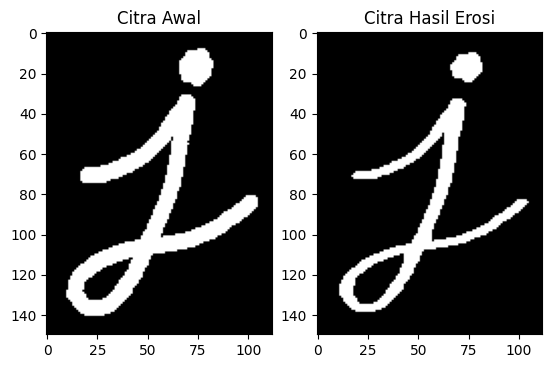

In [58]:
# Erosi Line Vertikal 5

kernel = np.ones((5,1),np.uint8) 
erosion = cv.morphologyEx(img_j, cv.MORPH_ERODE, kernel)

print("SE = Line Vertikal 5")

plt.subplot(121), plt.imshow(img_j), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')